# Iris Flower Classification : 

## Importing Important Libraries and Dataset :

In [107]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [70]:
data  =  pd.read_csv(r"Iris.csv")

In [71]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Target Table : 

In [75]:
print("Target Table :", data['Species'].unique())

Target Table : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Data Preprocessing : 

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [108]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## We got 0 null values, now we will check for the duplicate data :

In [73]:
data.duplicated().sum()

0

In [74]:
data.drop(columns="Id",inplace = True)

## EDA (Exploratory Data Analysis) :

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



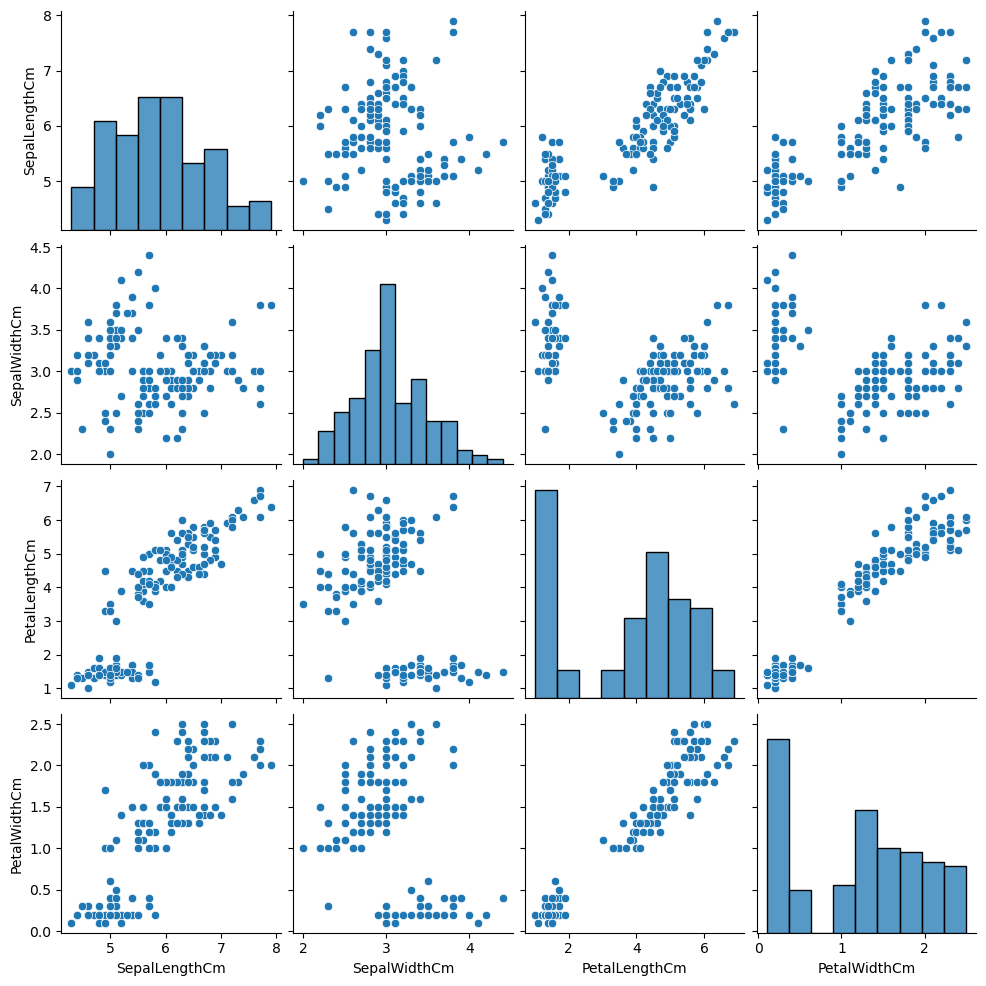

In [76]:
sns.pairplot(data = data)
plt.show()

## Now let’s plot the data using a scatter plot which will plot the iris species according to the sepal length and sepal width : 

In [77]:
import plotly.express as px
fig = px.scatter(data, x="SepalWidthCm", y="SepalLengthCm", color="Species")
fig.show()

# Model Building & Training : 

In [106]:
x = data.iloc[:,:-1]
y = data['Species']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [80]:
knn = KNeighborsClassifier()

## Selecting the best parameter for our model : 

In [81]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

In [82]:
rd = RandomizedSearchCV(knn,param_grid, cv = 5, scoring = 'accuracy', n_iter = 10,random_state=42)

In [83]:
rd.fit(x_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

## So here we got the best parameters for our model : 

In [84]:
print("Best Hyperparameters :", rd.best_params_)
print("Best Score :", rd.best_score_*100)

Best Hyperparameters : {'weights': 'uniform', 'p': 1, 'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'ball_tree'}
Best Score : 95.49407114624506


In [85]:
best_model = rd.best_estimator_
print("Best Model :",rd.best_estimator_)

Best Model : KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=3, p=1)


In [93]:
print("Training Score :",best_model.score(x_train,y_train)*100,"\nTesting Score :",best_model.score(x_test,y_test)*100)

Training Score : 94.64285714285714 
Testing Score : 100.0


# Prediction Time : 

In [111]:
x_new = [[5.1,3.5,1.4,0.2]]
prediction = best_model.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



# Conclusion :  In conclusion, we successfully classified iris species using the KNN algorithm. This project highlighted the importance of hyperparameter tuning for enhancing model performance.